In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('malwr.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,name,KERNEL32.DLL,LoadLibraryA,ExitProcess,GetProcAddress,VirtualProtect,MSVCRT.dll,atol,SHELL32.dll,SHChangeNotify,...,_iob,NETAPI32.dll,Netbios,PSAPI.DLL,EnumProcessModules,GetDC,ntdll.dll,WSAGetLastError,ShellExecuteA,WSASetLastError
0,99A39866A657A10949FCB6D634BB30D5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,KLp90_6D5C8FC4B14559F73B6136D85B94198,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SAM_B659D71AE168E774FAAF38DB30F4A84,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FTTR9EA3C16194CE354C244C1B74C46CD92E,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GFT4_7DDD3D72EAD03C7518F5D47650C8572,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.shape

(40, 129)

In [6]:
#drop name column
df = df.drop(['name'], axis=1)

In [48]:
# convert from float64 to int64
df = df.astype('int64')
df.head()

,KERNEL32.DLL,LoadLibraryA,ExitProcess,GetProcAddress,VirtualProtect,MSVCRT.dll,atol,SHELL32.dll,SHChangeNotify,USER32.dll,...,_iob,NETAPI32.dll,Netbios,PSAPI.DLL,EnumProcessModules,GetDC,ntdll.dll,WSAGetLastError,ShellExecuteA,WSASetLastError
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# import PCA
from sklearn.decomposition import PCA

# create a PCA instance
pca = PCA(2)

# fit on data
pca.fit(df)

PCA(n_components=2)

In [53]:
new_df = pca.transform(df)
new_df

array([[-1.96739172, -1.16915261],
       [ 7.68737812, -0.0871219 ],
       [ 7.68737812, -0.0871219 ],
       [-1.92186279, -0.4969802 ],
       [ 6.40203698,  0.32676727],
       [-1.92186279, -0.4969802 ],
       [-2.00725804,  2.33175994],
       [-1.6842662 ,  2.70176479],
       [ 7.68737812, -0.0871219 ],
       [-1.56720103, -0.15131943],
       [-1.56720103, -0.15131943],
       [-1.80519996,  2.84013672],
       [-1.96739172, -1.16915261],
       [-1.96739172, -1.16915261],
       [-1.96739172, -1.16915261],
       [-1.92186279, -0.4969802 ],
       [-1.92186279, -0.4969802 ],
       [ 7.68737812, -0.0871219 ],
       [ 7.68737812, -0.0871219 ],
       [-1.96739172, -1.16915261],
       [-1.56720103, -0.15131943],
       [-1.89978587,  2.56944348],
       [-1.6842662 ,  2.70176479],
       [-1.96739172, -1.16915261],
       [-1.96739172, -1.16915261],
       [-1.89978587,  2.56944348],
       [-1.96739172, -1.16915261],
       [ 7.68737812, -0.0871219 ],
       [-1.96739172,

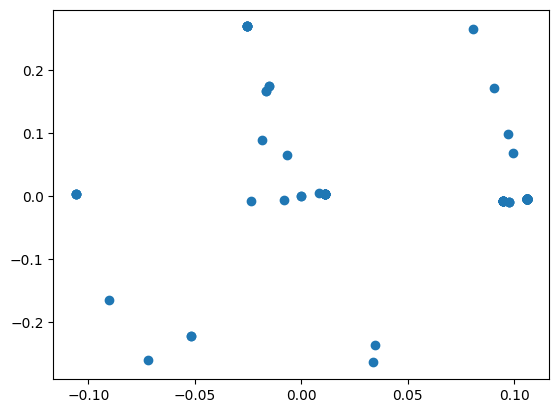

In [50]:
# plt scatter plot
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

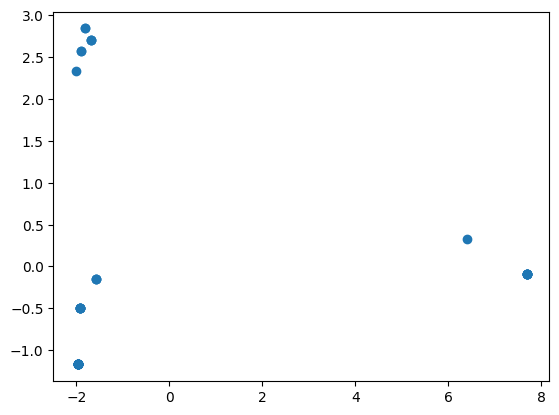

In [66]:
# plt scatter plot new_df
plt.scatter(new_df[:,0], new_df[:,1])
plt.show()

In [68]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [69]:
Kmeans = KMeans(init = 'random', n_clusters=4, n_init=10, max_iter=40, random_state=42)

In [70]:
Kmeans.fit(df)

KMeans(init='random', max_iter=40, n_clusters=4, random_state=42)

In [71]:
Kmeans.inertia_

60.125

In [72]:
Kmeans.cluster_centers_

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         8.75000000e-01,  7.50000000e-01,  6.25000000e-01,
         8.75000000e-01,  8.75000000e-01,  1.00000000e+00,
         6.25000000e-01, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17,  5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17,  5.55111512e-17,  5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17,  5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        -1.11022302e-16, -5.55111512e-17, -5.55111512e-17,
         5.55111512e-17, -5.55111512e-17,  5.55111512e-17,
         5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -5.55111512e-17,
        -5.55111512e-17, -5.55111512e-17, -5.55111512e-1

In [73]:
Kmeans.labels_

array([0, 2, 2, 0, 3, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0])

In [74]:
Kmeans.n_iter_

4

In [75]:
y_kmeans = Kmeans.predict(X)
y_kmeans[:5]

c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 2, 2, 0, 3])

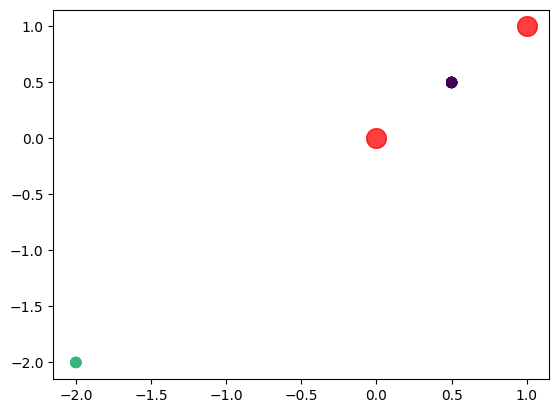

In [76]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')


centers = Kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Metodo del codo

In [77]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [78]:
wss = calculate_WSS(X, 15)
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2174413888.py:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2174413888.py:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2174413888.py:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2174413888.py:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2174413888.py:5: ConvergenceWarning: Number of distinct clusters (9) found sma

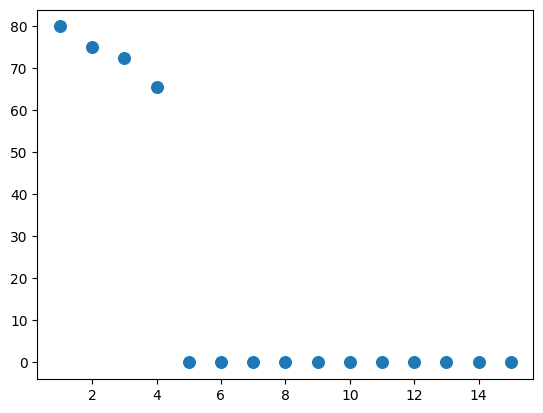

In [79]:
plt.scatter(k[:], wss[:], s = 70)

In [22]:
print(wss)

[80.0, 75.0, 72.41379310344824, 65.625, 6.77927340424307e-32, 6.77927340424307e-32, 1.6023737137301802e-31, 1.4791141972893971e-31, 1.2942249226282225e-31, 1.6640034719505718e-31, 1.2942249226282225e-31, 1.2942249226282225e-31, 1.2942249226282225e-31, 1.2942249226282225e-31, 1.2942249226282225e-31]


In [19]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

for k in range (2, kmax+1):
  kmeans = KMeans(
        init = "random",
        n_clusters = k,
        n_init = 1,
        max_iter = 200,
        random_state = 123
    ).fit(X)
  etiquetas = kmeans.labels_
  sil.append(silhouette_score(X, etiquetas, metric = 'euclidean'))

C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2525668258.py:7: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2525668258.py:7: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2525668258.py:7: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2525668258.py:7: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans = KMeans(
C:\Users\Christian\AppData\Local\Temp\ipykernel_24472\2525668258.py:7: ConvergenceWarning: Number of distinct clusters (9) found sma

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


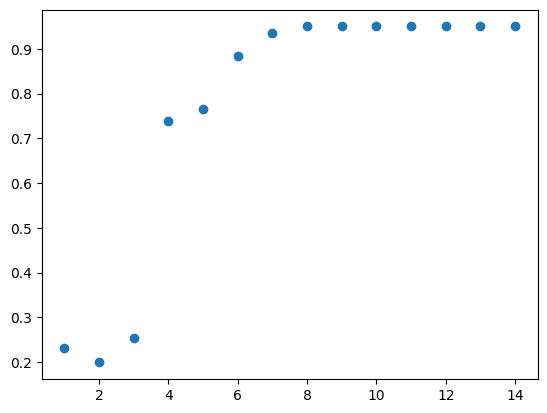

In [20]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
print(k)

plt.scatter(k, sil)


In [21]:
print(sil)

[0.2306906574630821, 0.1990318897554063, 0.2545801112063953, 0.7380706647678305, 0.7652545879103427, 0.8841972564880078, 0.9350749076053516, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]
